In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
housing = pd.read_csv(r"C:\Users\91946\Documents\Machine Learning\data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### <font color = "Green" > Target variable is MEDV remaing all are features

<font color="purple" >CRIM:- Per Capita Crime Rate By Town                          
ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.                               
INDUS: This is the proportion of non-retail business acres per town
CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)       
NOX: This is the nitric oxides concentration (parts per 10 million)                     
RM: This is the average number of rooms per dwelling                         
AGE: This is the proportion of owner-occupied units built prior to 1940                        
DIS: This is the weighted distances to five Boston employment centers               
RAD: This is the index of accessibility to radial highways                                 
TAX: This is the full-value property-tax rate per 10,000 dollar                                                               
PTRATIO: This is the pupil-teacher ratio by town                                                                        
B: This is calculated as 1000 (Bk — 0.63)², where Bk is the proportion of people of African American descent by town                
LSTAT: This is the percentage lower status of the population                                        
MEDV: This is the median value of owner-occupied homes in $1000s                                    

In [4]:
### Lets rename the target variable for better understanding
housing.rename(columns={'MEDV' : "PRICE"},inplace=True)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
housing.isnull().sum()  ## RM conatains 5 null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Calculate the percentage of Null Values each column have

In [8]:
(housing.isnull().sum()/len(housing))*100  

CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
RM         0.988142
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
PRICE      0.000000
dtype: float64

In [9]:
housing["RM"].isnull().sum()

5

In [10]:
housing[housing["RM"].isnull()]     ## These 5 are the null values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
10,0.22489,12.5,7.87,0,0.524,NaN,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
63,0.12650,25.0,5.13,0,0.453,NaN,43.4,7.9809,8,284,19.7,395.58,9.50,25.0
96,0.11504,0.0,2.89,0,0.445,NaN,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
135,0.55778,0.0,21.89,0,0.624,NaN,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [11]:
RM_median=housing["RM"].median()
housing["RM"].fillna(RM_median,inplace=True) ## Replace NaN values with median

In [12]:
housing["RM"].shape

(506,)

In [13]:
housing["RM"].isnull().sum()

0

## &#128125; <font color="green" > Train-Test Splitting  

In [14]:
Features=housing.drop("PRICE",axis=1)
Price=housing["PRICE"]

In [15]:
## Round off the value of the PRICE column
Price=np.round(housing["PRICE"])
Price

0      24.0
1      22.0
2      35.0
3      33.0
4      36.0
       ... 
501    22.0
502    21.0
503    24.0
504    22.0
505    12.0
Name: PRICE, Length: 506, dtype: float64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(Features,Price,test_size=0.2,random_state=42)

In [17]:
len(x_test)

102

## Looking for Correlations

In [18]:
corr_matrix=housing.corr()


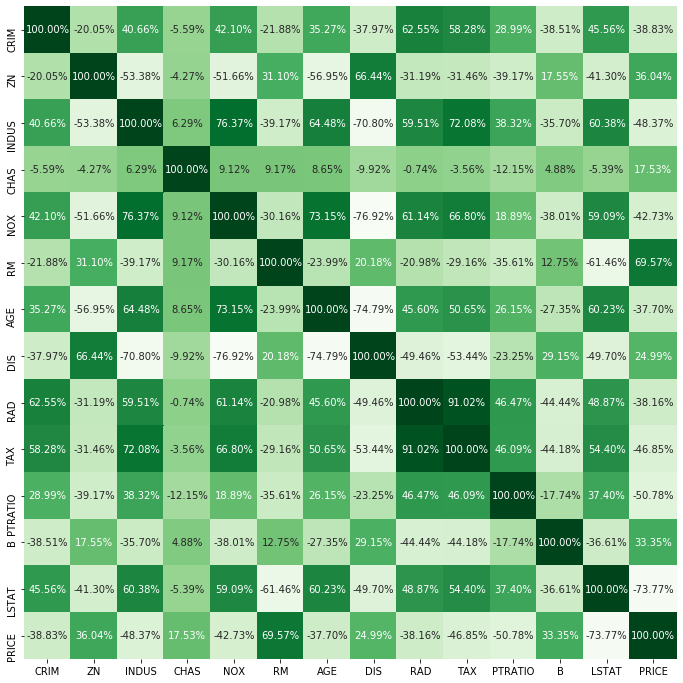

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,cbar=False,square=True,fmt='0.2%',annot=True,cmap="Greens")
plt.show()

## Selecting a desired model 

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

In [43]:
model1=RandomForestRegressor()
model1.fit(x_train,y_train)
print("Accuracy of Model is ",model1.score(x_test,y_test)*100,"percent")

Accuracy of Model is  89.0245958027183 percent


In [44]:
model2=SVC()
model2.fit(x_train,y_train)
print("Accuracy of Model is ",model2.score(x_test,y_test)*100,"percent")

Accuracy of Model is  5.88235294117647 percent


In [45]:
model3=LinearRegression()
model3.fit(x_train,y_train)
print("Accuracy of Model is ",model3.score(x_test,y_test)*100,"percent")

Accuracy of Model is  66.28762115174892 percent


## Evaluating the model

In [23]:
from sklearn.metrics import mean_squared_error

In [46]:
pred=model1.predict(x_test)
MSE=mean_squared_error(y_test,pred)
RMSE=np.sqrt(MSE)
RMSE

2.833483444697101

In [48]:
pred=model2.predict(x_test)
MSE=mean_squared_error(y_test,pred)
RMSE=np.sqrt(MSE)
RMSE

7.960071927943818

In [50]:
pred=model3.predict(x_test)
MSE=mean_squared_error(y_test,pred)
RMSE=np.sqrt(MSE)
RMSE

4.96598172821418

#### Random Forest Regression have highest accuracy and lowest Root Mean Squared Error

## Using better evaluation technique - Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

In [65]:
scores = cross_val_score(model1,x_test,y_test,cv=10)
print(scores.mean())

0.7585141475605909


## Using the model

In [90]:
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model1.predict(features)

array([28.38])

In [112]:
features=np.linspace(0,20,13).reshape(1,13)
model1.predict(features)

array([37.12])

###  Model is working FINE